In [1]:
import math
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Col=['TenantId2','Det','TenantId','Name','Country','CountryCode','Region','City','CommunicationLanguage','CommunicationCulture',
     'CreatedDate','CreateDateOfFirstSubscription','PurchaseDateOfFirstNonTrialSubscription','TenantState','TenantType',
     'EXOEnabledUsers','LicensedUsers','LYOEnabledUsers','SPOEnabledUsers','OD4BEnabledUsers','ProPlusEnabledUsers','TotalUsers',
     'EDUSubscriptionsCount','ExchangeSubscriptionsCount','LyncSubscriptionsCount','PaidSubscriptionCount',
     'ProjectSubscriptionsCount','SharePointSubscriptionsCount','TotalSubscriptionCount','TrialSubscriptionCount',
     'VisioSubscriptionsCount','HasEducation','HasCharity','HasGovernment','HasExchange','HasLync','HasSharePoint','HasProPlus',
     'HasYammer','HasSubscription','HasProject','HasPaid','HasVisio','HasTrial','DomainCount','CommerceTenantTagsArray',
     'CommerceTenantTagsCount','AssignedPlanServiceTypeArray','AssignedPlanCount','PartnerTenantCount','SubscriptionCount',
     'ConciergeInfoIsConceirge','IsConcierge','ConciergeInfoIsManualAdmittance','ConciergeInfoProgramId',
     'CompanyLastDirSyncTime','DirectoryExtensionsSyncEnabled','DirSyncEnabled','PasswordSyncEnabled','PasswordSyncTime',
     'PasswordWriteBackEnabled','IsDonMT','IsViral','IsTest','IsQuickStart','IsFastTrackTenant','HasSKUE3','HasSKUE5',
     'SPOEnvironment','IsRestrictRmsViralSignUp','IsMSODSDeleted','TotalGroupCount','CurrentDefaultDomain',
     'O365TenantReleaseTrack','DefaultDataLocation','SnapshotTime','MSODSTenant_CompanyTags','MSODSTenant_ExtensionAttributes',
     'MSODSTenant_DirSyncEnabled','CPTenant_ChannelName','FirstTicketAge','FirstTicketDate','LastTicketDate',
     'TotalTickets','MinCloseTime','MaxCloseTime','MedCloseTime','SubscriptionEndDate','DaysToSubEndDate','SubscriptionStartDate',
     'DaysTicketOpenAfterSubStart','TicketsFeedRecency','NumberOfTickets_Past7Days','NumberOfTickets_Past28Days',
     'NumberOfTickets_Past90Days','NumberOfTickets_Past180Days','NumberOfTickets_Past360Days','Age_at_First_Ticket_Bucket',
     'PercentOfTickets','TotalTickets1Year','Percent_Of_Tickets_Bucket','Exchange_unable_to_connect_sync_with_exchange',
     'SharePoint_manage_sites_documents_and_lists','Admin_Get_reports_insights_and_usage_patterns_for_my_Office_365_tenant',
     'Office_Client_Use_Office_apps_including_Mac','Admin_Find_and_signup_for_the_correct_Office_365_plan',
     'Dynamics_CRM_Setup_and_use_Dynamics_CRM_and_Parature_services','Intune_Download_Setup_and_Use_Intune',
     'OneDrive_Setup_OneDrive_and_sync_my_documents','Admin_Sign_in_and_password_issues',
     'Mobile_Connect_and_configure_mobile_devices','Setup_and_use_Stream','Exchange_Use_calendar_free_busy_and_contacts',
     'Install_setup_and_use_Power_Bi','Commerce_Manage_bills_payments_subscriptions_and_licenses',
     'Exchange_Migrate_my_data_to_Office_365','Office_Client_Download_install_and_activate_Office_apps_including_Mac',
     'Other','Setup_and_use_OneNote','Exchange_Setup_and_manage_mailbox_exchange_online','Setup_and_use_PowerPoint',
     'Exchange_Enable_hybrid_capabilities','Setup_compliance_features_like_Archive_Retention_Litigation_eDiscovery_and_MDM',
     'Admin_Setup_domain_and_DNS_settings_for_Office_365','Exchange_Use_OWA_Outlook_Web_App',
     'Outlook_Setup_and_use_Outlook_including_Mac','Office_Client_Word','Yammer_Setup_and_use_Yammer_services',
     'Office_Client_Excel','Prevent_user_accounts_from_getting_compromised','Send_and_receive_mail_on_time',
     'Admin_Global_Office_365_setup_and_administration_DirSync_ADFS_Global_Exchange_settings',
     'Admin_Manage_my_users_groups_and_resources','Setup_and_use_Project','Skype_Setup_and_use_Skype_services',
     'Keep_mailboxes_free_of_spam_and_viruses','Project_and_Planner_manage_projects_and_plans','Setup_and_use_Delve_Analytics',
     'Teams_Download_Setup_and_Use_Microsoft_Teams',	'L7TotalUsage',	'L14TotalUsage',	'L28TotalUsage',	'ProjectL7Usage',	'PublisherL7Usage',	'OutlookL7Usage',	'WordL7Usage',	'VisioL7Usage',	'OneNoteL7Usage',	'ExcelL7Usage',	'AccessL7Usage',	'LyncL7Usage',	'PowerPointL7Usage',	'ProjectL14Usage',	'PublisherL14Usage',	'OutlookL14Usage',	'WordL14Usage',	'VisioL14Usage',	'OneNoteL14Usage',	'ExcelL14Usage',	'AccessL14Usage',	'LyncL14Usage',	'PowerPointL14Usage',	'ProjectL28Usage',	'PublisherL28Usage',	'OutlookL28Usage',	'WordL28Usage',	'VisioL28Usage',	'OneNoteL28Usage',	'ExcelL28Usage',	'AccessL28Usage',	'LyncL28Usage',	'PowerPointL28Usage',	'ProjectL7Usage_Percent',	'PublisherL7Usage_Percent',	'OutlookL7Usage_Percent',	'WordL7Usage_Percent',	'VisioL7Usage_Percent',	'OneNoteL7Usage_Percent',	'ExcelL7Usage_Percent',	'AccessL7Usage_Percent',	'LyncL7Usage_Percent',	'PowerPointL7Usage_Percent',	'ProjectL14Usage_Percent',	'PublisherL14Usage_Percent',	'OutlookL14Usage_Percent',	'WordL14Usage_Percent',	'VisioL14Usage_Percent',	'OneNoteL14Usage_Percent',	'ExcelL14Usage_Percent',	'AccessL14Usage_Percent',	'LyncL14Usage_Percent',	'PowerPointL14Usage_Percent',	'ProjectL28Usage_Percent',	'PublisherL28Usage_Percent',	'OutlookL28Usage_Percent',	'WordL28Usage_Percent',	'VisioL28Usage_Percent',	'OneNoteL28Usage_Percent',	'ExcelL28Usage_Percent',	'AccessL28Usage_Percent',	'LyncL28Usage_Percent',	'PowerPointL28Usage_Percent',	'ProjectL7Usage_Percent_Desc',	'PublisherL7Usage_Percent_Desc',	'OutlookL7Usage_Percent_Desc',	'WordL7Usage_Percent_Desc',	'VisioL7Usage_Percent_Desc',	'OneNoteL7Usage_Percent_Desc',	'ExcelL7Usage_Percent_Desc',	'AccessL7Usage_Percent_Desc',	'LyncL7Usage_Percent_Desc',	'PowerPointL7Usage_Percent_Desc',	'ProjectL14Usage_Percent_Desc',	'PublisherL14Usage_Percent_Desc',	'OutlookL14Usage_Percent_Desc',	'WordL14Usage_Percent_Desc',	'VisioL14Usage_Percent_Desc',	'OneNoteL14Usage_Percent_Desc',	'ExcelL14Usage_Percent_Desc',	'AccessL14Usage_Percent_Desc',	'LyncL14Usage_Percent_Desc',	'PowerPointL14Usage_Percent_Desc',	'ProjectL28Usage_Percent_Desc',	'PublisherL28Usage_Percent_Desc',	'OutlookL28Usage_Percent_Desc',	'WordL28Usage_Percent_Desc',	'VisioL28Usage_Percent_Desc',	'OneNoteL28Usage_Percent_Desc',	'ExcelL28Usage_Percent_Desc',	'AccessL28Usage_Percent_Desc',	'LyncL28Usage_Percent_Desc',	'PowerPointL28Usage_Percent_Desc',	'Win10L7Usage',	'WinOtherL7Usage',	'MacL7Usage',	'iOSL7Usage',	'IPhoneL7Usage',	'AndroidL7Usage',	'Win10L14Usage',	'WinOtherL14Usage',	'MacL14Usage',	'iOSL14Usage',	'IPhoneL14Usage',	'AndroidL14Usage',	'Win10L28Usage',	'WinOtherL28Usage',	'MacL28Usage',	'iOSL28Usage',	'IPhoneL28Usage',	'AndroidL28Usage',	'Win10L7Usage_Percent',	'WinOtherL7Usage_Percent',	'MacL7Usage_Percent',	'iOSL7Usage_Percent',	'IPhoneL7Usage_Percent',	'AndroidL7Usage_Percent',	'Win10L14Usage_Percent',	'WinOtherL14Usage_Percent',	'MacL14Usage_Percent',	'iOSL14Usage_Percent',	'IPhoneL14Usage_Percent',	'AndroidL14Usage_Percent',	'Win10L28Usage_Percent',	'WinOtherL28Usage_Percent',	'MacL28Usage_Percent',	'iOSL28Usage_Percent',	'IPhoneL28Usage_Percent',	'AndroidL28Usage_Percent',	'Win10L7Usage_Percent_Desc',	'WinOtherL7Usage_Percent_Desc',	'MacL7Usage_Percent_Desc',	'iOSL7Usage_Percent_Desc',	'IPhoneL7Usage_Percent_Desc',	'AndroidL7Usage_Percent_Desc',	'Win10L14Usage_Percent_Desc',	'WinOtherL14Usage_Percent_Desc',	'MacL14Usage_Percent_Desc',	'iOSL14Usage_Percent_Desc',	'IPhoneL14Usage_Percent_Desc',	'AndroidL14Usage_Percent_Desc',	'Win10L28Usage_Percent_Desc',	'WinOtherL28Usage_Percent_Desc',	'MacL28Usage_Percent_Desc',	'iOSL28Usage_Percent_Desc',	'IPhoneL28Usage_Percent_Desc',	'AndroidL28Usage_Percent_Desc',	'LatestFeedbackDateTime',	'TotalFeedbacks',	'LatestSATScore',	'LatestSATType',	'CompositeSATScore',	'CompositeSATType',
]

In [3]:
data = pd.read_csv("data/AppendLabel.txt" ,sep='\t',  lineterminator='\n', names=Col)

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (74) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.head()

,TenantId2,Det,TenantId,Name,Country,CountryCode,Region,City,CommunicationLanguage,CommunicationCulture,...,MacL28Usage_Percent_Desc,iOSL28Usage_Percent_Desc,IPhoneL28Usage_Percent_Desc,AndroidL28Usage_Percent_Desc,LatestFeedbackDateTime,TotalFeedbacks,LatestSATScore,LatestSATType,CompositeSATScore,CompositeSATType
0,000032cf-080d-4d56-a74b-ddb2895c0e20,0.0,000032cf-080d-4d56-a74b-ddb2895c0e20,ZEROS GMBH,Germany,DE,Germany,BERLIN,EN,EN-US,...,NOT_USED,NOT_USED,NOT_USED,Less_than_25Pct,9/18/2017 5:46:51 AM,1.0,0.0,Detractor,0.0,Detractor\r
1,000095a5-95c0-4e5f-9941-9277c3c91f6e,1.0,000095a5-95c0-4e5f-9941-9277c3c91f6e,TITA FASHION GMBH,Germany,DE,Germany,MÜNCHEN,en,EN-US,...,75Pct_or_more,NOT_USED,NOT_USED,NOT_USED,NaN,NaN,NaN,NaN,NaN,\r
2,0000d141-461b-4672-b95d-e20dedc07011,0.0,0000d141-461b-4672-b95d-e20dedc07011,CONCESIÓN LA PINTADA SAS,Colombia,CO,Latam,MEDELLIN,es,ES-CO,...,Less_than_25Pct,NOT_USED,NOT_USED,Less_than_25Pct,1/15/2018 5:20:09 AM,1.0,200.0,Promotor,200.0,Promotor\r
3,0000d17f-c8ed-4ec8-b6a3-dbbe3eaef433,0.0,0000d17f-c8ed-4ec8-b6a3-dbbe3eaef433,JAN VALENTIK,Czech Republic,CZ,Central and Eastern Europe,PISEK,cs,CS-CZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
4,0000e9ea-9ee3-4793-9563-177e444fb497,0.0,0000e9ea-9ee3-4793-9563-177e444fb497,CHARTERED INSTITUTE OF HOUSING,United Kingdom,GB,UK,COVENTRY,en,EN-GB,...,NOT_USED,NOT_USED,NOT_USED,NOT_USED,NaN,NaN,NaN,NaN,NaN,\r


In [4]:
empty_to_zero = open("new_data/Emptyto_Zero.txt","r")
Emptyto_Zero = empty_to_zero.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
empty_to_zero.close()
str_to_cat = open("new_data/StrTo_Cat.txt","r")
StrTo_Cat = str_to_cat.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
str_to_cat.close()

In [5]:
def preprocess_tenant_data(data):
    data_s=data.drop(['CommunicationCulture',	'CreatedDate',	'CreateDateOfFirstSubscription',	'PurchaseDateOfFirstNonTrialSubscription',	
    'CommerceTenantTagsArray','AssignedPlanServiceTypeArray','ConciergeInfoIsConceirge',	'ConciergeInfoProgramId',	
    'CompanyLastDirSyncTime',	'PasswordSyncTime','CurrentDefaultDomain','SnapshotTime',	'MSODSTenant_CompanyTags',	
    'MSODSTenant_ExtensionAttributes',	'MSODSTenant_DirSyncEnabled',	'FirstTicketDate',	'LastTicketDate',	'SubscriptionEndDate',	'SubscriptionStartDate',	'Percent_Of_Tickets_Bucket',	
    'LatestFeedbackDateTime',	'Name',	'Country',	'City', #'LastCol', 
                      'DefaultDataLocation'],axis=1)
    
    for x in Emptyto_Zero:
        data_s.loc[data_s[x].isnull(), x] =0

    for x in StrTo_Cat:
        print(x)
        data_s.loc[data_s[x].isnull(), x] ='No_Data'
        data_s[x]= data_s[x].astype('category')


    # for x in StrTo_Cat:
    #     print(x)
    print('data_s tenant count: ', data_s.shape)

    #data_s[StrTo_Cat]= data_s[StrTo_Cat].apply(lambda x: x.cat.codes) <-- THIS WAS WHAT WAS CAUSING MISMATCH


    data_s = pd.DataFrame(data_s)
    for i, x in enumerate(StrTo_Cat):
            data_s = pd.concat([data_s, pd.get_dummies(data_s[x], prefix=x, prefix_sep='_',)], axis = 1)
            #drop the original column
            del data_s[x]
            print(i,len(StrTo_Cat)+1)

    #alt_null_fields = [] 
    for x in Emptyto_Zero:
        print(x)
        if '#NULL#' in data_s[x].unique():
            #print(' has alt nulls')
            #alt_null_fields.append(x)
            data_s[x] = data_s[x].replace('#NULL#','0')
        data_s.loc[data_s[x].isnull(), x] =0
        data_s[x]=pd.to_numeric(data_s[x])

    df_log_s = pd.DataFrame(data_s)
    for c in Emptyto_Zero:
        df_log_s[c]=df_log_s[c].apply(lambda x:0 if x <= 0 else math.log(x))

    print(df_log_s.shape)

    df_logMM_s = pd.DataFrame(df_log_s)

    scaler = preprocessing.MinMaxScaler()
    for c in Emptyto_Zero:
        # print(c)
        df_logMM_s[c] = scaler.fit_transform(df_logMM_s[c].values.reshape(-1, 1))
    
    return df_logMM_s

In [6]:
df = data.drop(list(data.filter(regex = 'TenantId')), axis = 1)

In [7]:
df = preprocess_tenant_data(df)

TenantState
TenantType
HasEducation
HasCharity
HasGovernment
HasExchange
HasLync
HasSharePoint
HasProPlus
HasYammer
HasSubscription
HasProject
HasPaid
HasVisio
HasTrial
IsConcierge
DirectoryExtensionsSyncEnabled
DirSyncEnabled
PasswordSyncEnabled
PasswordWriteBackEnabled
IsDonMT
IsViral
IsTest
IsQuickStart
IsFastTrackTenant
HasSKUE3
HasSKUE5
SPOEnvironment
IsRestrictRmsViralSignUp
IsMSODSDeleted
CommunicationLanguage
ConciergeInfoIsManualAdmittance
CPTenant_ChannelName
Age_at_First_Ticket_Bucket
ProjectL7Usage_Percent_Desc
PublisherL7Usage_Percent_Desc
OutlookL7Usage_Percent_Desc
WordL7Usage_Percent_Desc
VisioL7Usage_Percent_Desc
OneNoteL7Usage_Percent_Desc
ExcelL7Usage_Percent_Desc
AccessL7Usage_Percent_Desc
LyncL7Usage_Percent_Desc
PowerPointL7Usage_Percent_Desc
ProjectL14Usage_Percent_Desc
PublisherL14Usage_Percent_Desc
OutlookL14Usage_Percent_Desc
WordL14Usage_Percent_Desc
VisioL14Usage_Percent_Desc
OneNoteL14Usage_Percent_Desc
ExcelL14Usage_Percent_Desc
AccessL14Usage_Percent_Desc

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


LicensedUsers
LYOEnabledUsers
SPOEnabledUsers
OD4BEnabledUsers
ProPlusEnabledUsers
TotalUsers
EDUSubscriptionsCount
ExchangeSubscriptionsCount
LyncSubscriptionsCount
PaidSubscriptionCount
ProjectSubscriptionsCount
SharePointSubscriptionsCount
TotalSubscriptionCount
TrialSubscriptionCount
VisioSubscriptionsCount
SubscriptionCount
FirstTicketAge
TotalTickets
MinCloseTime
MaxCloseTime
MedCloseTime
DaysToSubEndDate
DaysTicketOpenAfterSubStart
TicketsFeedRecency
NumberOfTickets_Past7Days
NumberOfTickets_Past28Days
NumberOfTickets_Past90Days
NumberOfTickets_Past180Days
NumberOfTickets_Past360Days
PercentOfTickets
TotalTickets1Year
Exchange_unable_to_connect_sync_with_exchange
SharePoint_manage_sites_documents_and_lists
Admin_Get_reports_insights_and_usage_patterns_for_my_Office_365_tenant
Office_Client_Use_Office_apps_including_Mac
Admin_Find_and_signup_for_the_correct_Office_365_plan
Dynamics_CRM_Setup_and_use_Dynamics_CRM_and_Parature_services
Intune_Download_Setup_and_Use_Intune
OneDrive_

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\v-Jaand\AppData\Local\Continuum\ana

In [8]:
X = df.drop(list(df.filter(regex = 'Det')), axis = 1)

In [9]:
X.tail()

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,Region_Japan,Region_Latam,Region_MEA,Region_No_Data,Region_UK,Region_United States,Region_Western Europe,O365TenantReleaseTrack_FirstRelease,O365TenantReleaseTrack_No_Data,O365TenantReleaseTrack_StagedRollout
330093,0.00000,0.126527,0.000000,0.117854,0.127994,0.132679,0.142849,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
330094,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
330095,0.00000,0.071434,0.000000,0.072262,0.072262,0.074907,0.142849,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
330096,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
330097,0.04507,0.045070,0.045593,0.045592,0.045592,0.047261,0.071424,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [10]:
X.to_csv('AppendLabel_Fmatrix.csv')

In [16]:
pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
len(principalDf)
principalDf.rename(columns={0:'principal component 1', 1:'principal component 2'}, inplace=True)
finalDf = pd.concat([principalDf.iloc[:,0:2], df[['Det']]], axis = 1)

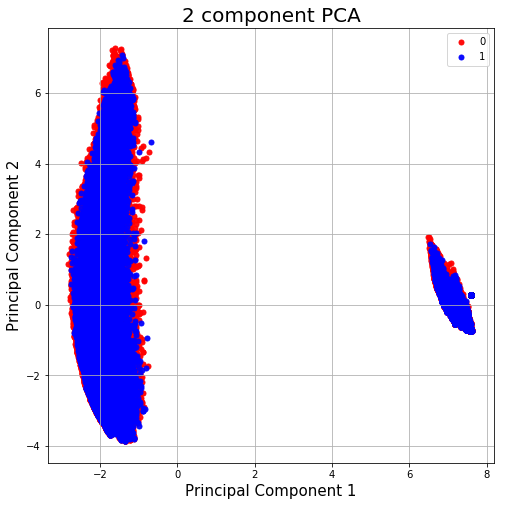

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Det'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 25, alpha = 0.95)
ax.legend(targets)
ax.grid()

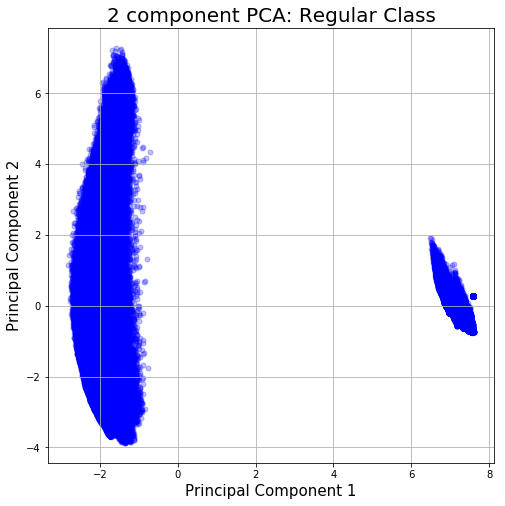

In [18]:
training_targets = finalDf[finalDf['Det'] == 0]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Regular Class', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = 'b'
            , s = 25, alpha = 0.25)
ax.grid()

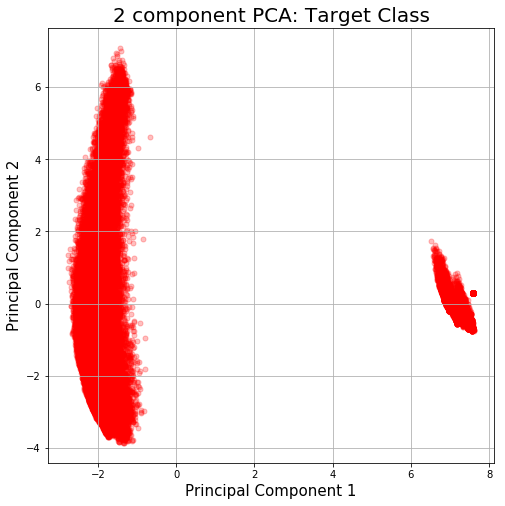

In [19]:
training_targets = finalDf[finalDf['Det'] == 1]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Target Class', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = 'r'
            , s = 25, alpha = 0.25)
ax.grid()

In [41]:
from sklearn.metrics import classification_report, silhouette_samples, silhouette_score

In [43]:
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(training_targets)
    sil_avg = silhouette_score(training_targets, km.labels_)
    return sil_avg

sil_scores = [get_silhouette_score(i) for i in range(2,6)]

Text(0.5,1,'Silhouette Score vs K')

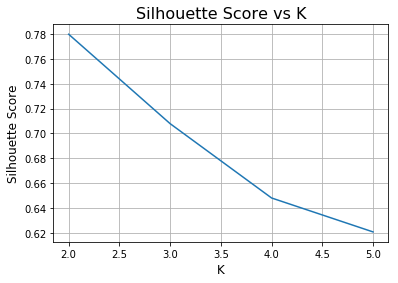

In [44]:
plt.grid()
plt.plot(range(2,6), sil_scores)
plt.xlabel('K',fontsize=12)
plt.ylabel('Silhouette Score',fontsize=12)
plt.title('Silhouette Score vs K',fontsize=16)

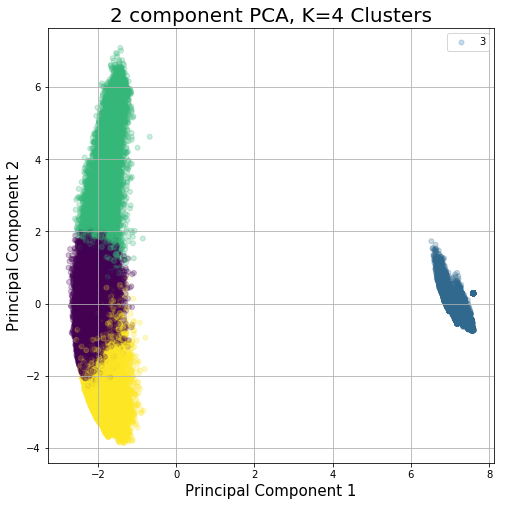

In [20]:
training_targets = finalDf[finalDf['Det'] == 1]
kmeans = KMeans(n_clusters=4, random_state=0).fit(X[df.Det==1])
k_labels = pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA, K=4 Clusters', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = k_labels
            , s = 25, alpha = 0.25)
ax.legend(k_labels.unique())
ax.grid()

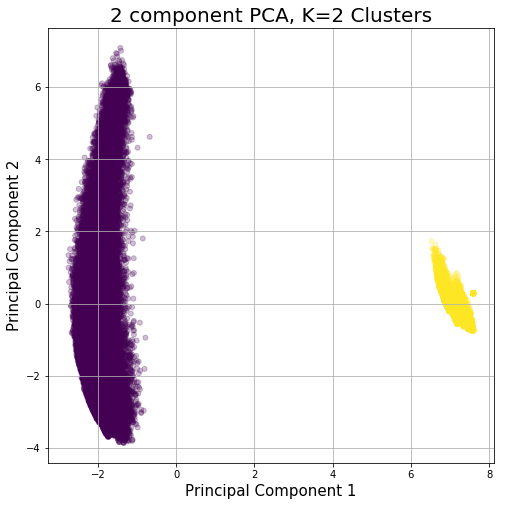

In [14]:
training_targets = finalDf[finalDf['Det'] == 1]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X[df.Det==1])
k_labels = pd.Series(kmeans.labels_)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA, K=2 Clusters', fontsize = 20)
ax.scatter(training_targets['principal component 1']
            , training_targets['principal component 2']
            , c = k_labels
            , s = 25, alpha = 0.25)
ax.grid()

In [17]:
data_s=data.drop(['CommunicationCulture',	'CreatedDate',	'CreateDateOfFirstSubscription',	'PurchaseDateOfFirstNonTrialSubscription',	
    'CommerceTenantTagsArray','AssignedPlanServiceTypeArray','ConciergeInfoIsConceirge',	'ConciergeInfoProgramId',	
    'CompanyLastDirSyncTime',	'PasswordSyncTime','CurrentDefaultDomain','SnapshotTime',	'MSODSTenant_CompanyTags',	
    'MSODSTenant_ExtensionAttributes',	'MSODSTenant_DirSyncEnabled',	'FirstTicketDate',	'LastTicketDate',	'SubscriptionEndDate',	'SubscriptionStartDate',	'Percent_Of_Tickets_Bucket',	
    'LatestFeedbackDateTime',	'Name',	'Country',	'City', 'TenantId', 'TenantId2', #'LastCol', 
                      'DefaultDataLocation'],axis=1)

In [18]:
detractor_df = data_s[df.Det==1]

In [19]:
len(detractor_df), len(k_labels)

(53386, 53386)

In [20]:
detractor_df.reset_index(inplace=True, drop=True)
detractor_df['cluster_label'] = k_labels

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
detractor_df.head()

,Det,CountryCode,Region,CommunicationLanguage,TenantState,TenantType,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,...,MacL28Usage_Percent_Desc,iOSL28Usage_Percent_Desc,IPhoneL28Usage_Percent_Desc,AndroidL28Usage_Percent_Desc,TotalFeedbacks,LatestSATScore,LatestSATType,CompositeSATScore,CompositeSATType,cluster_label
0,1.0,DE,Germany,en,Active,RegularTenant,0.0,1.0,0.0,1.0,...,75Pct_or_more,NOT_USED,NOT_USED,NOT_USED,NaN,NaN,NaN,NaN,\r,0
1,1.0,DE,Germany,de,Active,RegularTenant,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r,1
2,1.0,IE,Western Europe,en,Active,RegularTenant,350.0,365.0,188.0,195.0,...,Less_than_25Pct,Less_than_25Pct,NOT_USED,Less_than_25Pct,2.0,200.0,Promotor,-1.0,Undecided\r,0
3,1.0,NL,Western Europe,nl,Active,BreadthPartnerDelegatedAdmin,4.0,4.0,4.0,4.0,...,NOT_USED,Less_than_25Pct,NOT_USED,Less_than_25Pct,3.0,200.0,Promotor,200.0,Promotor\r,0
4,1.0,US,United States,en,Active,RegularTenant,54661.0,29348.0,1145.0,532.0,...,Less_than_25Pct,Less_than_25Pct,NOT_USED,Less_than_25Pct,88.0,0.0,Detractor,-1.0,Undecided\r,0


In [76]:
detractor_df.to_csv('new_data/AppendLabelDetractors(2Clusters).csv')

In [ ]:
cluster_dict = {}
# for i, cluster in enumerate(sorted(df.cluster_label.unique())):
#     cluster_dict['Cluster_'+str(i+1)] = df[df.cluster_label==cluster]

# distributions = pd.DataFrame()
# for key in cluster_dict.keys():
#     distributions[key] = cluster_dict[key].nunique()
                            

In [57]:
import scipy

In [82]:
scipy.stats.norm.rvs(size=11)

array([ 1.02770105,  0.94272026, -0.62189691, -0.08719552,  0.33856937,
        0.35299368,  0.44934352, -0.45610429, -1.4759031 ,  0.79200884,
       -0.00249572])

In [87]:
b = 2.62
mean, var, skew, kurt = scipy.stats.uniform.stats(b, moments='mvsk')
mean, var, skew, kurt

(array(3.12), array(0.08333333), array(0.), array(-1.2))

In [74]:
detractor_cluster_modes = detractor_df.groupby(['cluster_label']).agg([lambda x: list(x.mode()),'count'])
detractor_cluster_modes

Det        CountryCode                  Region         \
              <lambda>  count    <lambda>  count         <lambda>  count   
cluster_label                                                              
0                [1.0]  39684        [US]  39681  [United States]  39684   
1                [1.0]  13702        [US]  12874  [United States]  12875   

              CommunicationLanguage        TenantState         ...    \
                           <lambda>  count    <lambda>  count  ...     
cluster_label                                                  ...     
0                              [en]  39684    [Active]  39684  ...     
1                              [en]  12875    [Active]  12875  ...     

              TotalFeedbacks        LatestSATScore        LatestSATType  \
                    <lambda>  count       <lambda>  count      <lambda>   
cluster_label                                                             
0                      [1.0]  20629          [0.0]  20629   [Detractor]   
1                      [1.0]   3386          [0.0]   3386   [Detractor]   

                     CompositeSATScore        CompositeSATType         
               count          <lambda>  count         <lambda>  count  
cluster_label                                                          
0              20629             [0.0]  20629             [\r]  39684  
1               3386             [0.0]   3386             [\r]  13702  

[2 rows x 530 columns]

In [ ]:
same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
modes.drop(same_per_cluster,axis=1,inplace=True)
modes.dropna(axis=1,inplace=True)

In [38]:
modes = detractor_df.groupby(['cluster_label']).apply(pd.DataFrame.mode)
same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
modes.drop(same_per_cluster,axis=1,inplace=True)
modes.dropna(axis=1,inplace=True)

In [39]:
modes

,,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,LyncSubscriptionsCount,SharePointSubscriptionsCount,HasLync,HasProPlus,HasYammer,CommerceTenantTagsCount,AssignedPlanCount,SubscriptionCount,O365TenantReleaseTrack,FirstTicketAge,DaysToSubEndDate,Age_at_First_Ticket_Bucket,PercentOfTickets,cluster_label
cluster_label,,,,,,,,,,,,,,,,,,
0,0,1.0,1.0,1.0,1.0,1.0,True,True,True,3.0,10.0,2.0,StagedRollout,1548.0,339.0,3Y_5Y,50.0,0
1,0,0.0,0.0,0.0,0.0,0.0,False,False,False,4.0,5.0,1.0,FirstRelease,266.0,65.0,1Y_2Y,100.0,1


In [27]:
continuous= detractor_df.columns[detractor_df.dtypes == float]
means = detractor_df.groupby(['cluster_label'])[continuous].mean()
medians = detractor_df.groupby(['cluster_label'])[continuous].median()

In [71]:
detractor_cluster_means = detractor_df.groupby(['cluster_label'])[continuous].agg(['mean','count'])
detractor_cluster_means

Det        EXOEnabledUsers        LicensedUsers         \
              mean  count            mean  count          mean  count   
cluster_label                                                           
0              1.0  39684      512.370981  39684    639.369645  39684   
1              1.0  13702       16.157592  12875     20.479845  12875   

              LYOEnabledUsers        SPOEnabledUsers         ...    \
                         mean  count            mean  count  ...     
cluster_label                                                ...     
0                  335.319524  39684      463.863144  39684  ...     
1                    9.174214  12875       12.683806  12875  ...     

              IPhoneL28Usage_Percent        AndroidL28Usage_Percent         \
                                mean  count                    mean  count   
cluster_label                                                                
0                                0.0  39684                 6.40982  39684   
1                                NaN      0                     NaN      0   

              TotalFeedbacks        LatestSATScore        CompositeSATScore  \
                        mean  count           mean  count              mean   
cluster_label                                                                 
0                   5.135974  20629      83.629841  20629         54.067381   
1                   1.620201   3386      63.290018   3386         54.243946   

                      
               count  
cluster_label         
0              20629  
1               3386  

[2 rows x 356 columns]

In [72]:
detractor_cluster_medians = detractor_df.groupby(['cluster_label'])[continuous].agg(['median','count'])
detractor_cluster_medians

Det        EXOEnabledUsers        LicensedUsers         \
              median  count          median  count        median  count   
cluster_label                                                             
0                1.0  39684             8.0  39684          11.0  39684   
1                1.0  13702             1.0  12875           1.0  12875   

              LYOEnabledUsers        SPOEnabledUsers         ...    \
                       median  count          median  count  ...     
cluster_label                                                ...     
0                         5.0  39684             8.0  39684  ...     
1                         0.0  12875             0.0  12875  ...     

              IPhoneL28Usage_Percent        AndroidL28Usage_Percent         \
                              median  count                  median  count   
cluster_label                                                                
0                                0.0  39684                     0.0  39684   
1                                NaN      0                     NaN      0   

              TotalFeedbacks        LatestSATScore        CompositeSATScore  \
                      median  count         median  count            median   
cluster_label                                                                 
0                        2.0  20629          100.0  20629               0.0   
1                        1.0   3386            0.0   3386               0.0   

                      
               count  
cluster_label         
0              20629  
1               3386  

[2 rows x 356 columns]

In [75]:
detractor_cluster_means.to_csv('AppendLabel_ClusterMeansFull.csv')
detractor_cluster_medians.to_csv('AppendLabel_ClusterMediansFull.csv')
detractor_cluster_modes.to_csv('AppendLabel_ClusterModesFull.csv')

In [29]:
means

,Det,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,...,AndroidL14Usage_Percent,Win10L28Usage_Percent,WinOtherL28Usage_Percent,MacL28Usage_Percent,iOSL28Usage_Percent,IPhoneL28Usage_Percent,AndroidL28Usage_Percent,TotalFeedbacks,LatestSATScore,CompositeSATScore
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,1.0,512.370981,639.369645,335.319524,463.863144,491.401774,412.531146,1045.761718,0.233041,1.636428,...,7.284383,59.579547,18.320548,11.937241,3.752843,0.0,6.40982,5.135974,83.629841,54.067381
1,1.0,16.157592,20.479845,9.174214,12.683806,12.584155,2.879845,120.611107,0.040388,0.822291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.620201,63.290018,54.243946


In [88]:
same_per_cluster = means.columns[means.nunique()==1]
means2 = means.drop(same_per_cluster,axis=1)
means2.dropna(axis=1,inplace=True)

In [31]:
medians

,Det,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,...,AndroidL14Usage_Percent,Win10L28Usage_Percent,WinOtherL28Usage_Percent,MacL28Usage_Percent,iOSL28Usage_Percent,IPhoneL28Usage_Percent,AndroidL28Usage_Percent,TotalFeedbacks,LatestSATScore,CompositeSATScore
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,1.0,8.0,11.0,5.0,8.0,8.0,5.0,17.0,0.0,1.0,...,0.0,73.98374,0.409626,0.0,0.0,0.0,0.0,2.0,100.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


In [89]:
same_per_cluster = medians.columns[medians.nunique()==1]
medians2 = medians.drop(same_per_cluster,axis=1)
medians2.dropna(axis=1,inplace=True)

In [91]:
means2

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,Admin_Manage_my_users_groups_and_resources,Setup_and_use_Project,Skype_Setup_and_use_Skype_services,Keep_mailboxes_free_of_spam_and_viruses,Project_and_Planner_manage_projects_and_plans,Setup_and_use_Delve_Analytics,Teams_Download_Setup_and_Use_Microsoft_Teams,TotalFeedbacks,LatestSATScore,CompositeSATScore
cluster_label,,,,,,,,,,,,,,,,,,,,,
0,512.370981,639.369645,335.319524,463.863144,491.401774,412.531146,1045.761718,0.233041,1.636428,1.392123,...,0.231440,0.00039,0.597568,0.660959,0.075268,0.008899,0.108488,5.135974,83.629841,54.067381
1,16.157592,20.479845,9.174214,12.683806,12.584155,2.879845,120.611107,0.040388,0.822291,0.494524,...,0.077039,0.00000,0.171624,0.207052,0.062667,0.002005,0.031250,1.620201,63.290018,54.243946


In [92]:
medians2.to_csv('AppendLabel_ClusterMedians.csv')
means2.to_csv('AppendLabel_ClusterMeans.csv')

In [ ]:
def compare_clusters(df, num_cluster):
    
    '''Appends clusters to dataset and generates statistics on differences between Clusters'''
    
    X = df.drop(list(df_1.filter(regex = 'Det')), axis = 1, inplace = True)
    X.drop('TenantId', inplace=True)
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(X[df_scale.Det==1])
    k_labels = pd.Series(kmeans.labels_)
    df['cluster_label'] = k_labels
    cluster_dict = {}
    for i, cluster in enumerate(sorted(df.cluster_label.unique()):
        cluster_dict['Cluster_'+str(i+1)] = df[df.cluster_label==cluster]

    distributions = pd.DataFrame()
    for key in cluster_dict.keys():
        distributions[key] = cluster_dict[key].nunique()
                            
    modes = df.groupby(['cluster_label'])[StrTo_Cat].apply(pd.DataFrame.mode)
    same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
    modes.drop(same_per_cluster,axis=1,inplace=True)
                                
    means = df.groupby(['cluster_label'])[Emptyto_Zero].mean()
                                
    medians = df.groupby(['cluster_label'])[Emptyto_Zero].median()
                                
    return distributions, modes, means, medians